<a href="https://colab.research.google.com/github/ay1011/deep-reinforcement-learning/blob/master/DLRND_Pong_REINFORCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/udacity/deep-reinforcement-learning.git

Cloning into 'deep-reinforcement-learning'...
remote: Enumerating objects: 223, done.
remote: Total 223 (delta 0), reused 0 (delta 0), pack-reused 223
Receiving objects: 100% (223/223), 3.45 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
cd deep-reinforcement-learning/python

/content/deep-reinforcement-learning/python


In [3]:
%%time
!pip install .

Processing /content/deep-reinforcement-learning/python
     |████████████████████████████████| 48.1MB 58kB/s 
     |████████████████████████████████| 6.4MB 17.4MB/s 
     |████████████████████████████████| 8.8MB 51.2MB/s 
     |████████████████████████████████| 484.0MB 35kB/s 
     |████████████████████████████████| 3.1MB 38.9MB/s 
     |████████████████████████████████| 890kB 48.0MB/s 
  Created wheel for unityagents: filename=unityagents-0.4.0-cp36-none-any.whl size=71639 sha256=a812e187b6c069026bc14957a916695a6e45305fcb465c75d0277585c3362a74
  Stored in directory: /tmp/pip-ephem-wheel-cache-a1as3wkl/wheels/bd/a8/ee/92382d56fce4e6c5349b90c133a67009b7c2b5e4d3673603cf
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=175c9e73816258624e8c723f156295c3a0f37af35336b782b27baee66f59002f
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built unityagents html5lib
ERROR: torchvisi

CPU times: user 723 ms, sys: 165 ms, total: 888 ms
Wall time: 2min 48s


In [4]:
!python -m ipykernel install --user --name drlnd --display-name "drlnd"

Installed kernelspec drlnd in /root/.local/share/jupyter/kernels/drlnd


In [5]:
!sudo apt install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 0s (6,101 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package xvfb.
(Reading database ... 144429 files and director

In [6]:
import gym
!pip install box2d

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

     |████████████████████████████████| 1.3MB 7.6MB/s 


xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [7]:
cd ..

/content/deep-reinforcement-learning


In [8]:
cd reinforce

/content/deep-reinforcement-learning/reinforce


In [9]:
!ls

parallelEnv.py	pong_utils.py  README.md  REINFORCE.ipynb


In [25]:
# install package for displaying animation
!pip install JSAnimation
!pip install matplotlib==2.1.0 # since JSANimation only works with this version 
# custom utilies for displaying animation, collecting rollouts and more
import pong_utils


%matplotlib inline

# check which device is being used. 
# I recommend disabling gpu until you've made sure that the code runs
device = pong_utils.device
print("using device: ",device)

     |████████████████████████████████| 15.0MB 210kB/s 
ERROR: seaborn 0.10.1 has requirement matplotlib>=2.1.2, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


using device:  cuda:0


In [11]:
# render ai gym environment
import gym
import time

# PongDeterministic does not contain random frameskip
# so is faster to train than the vanilla Pong-v4 environment
env = gym.make('PongDeterministic-v4')

print("List of available actions: ", env.unwrapped.get_action_meanings())

RIGHTFIRE = 4 
LEFTFIRE = 5
# the 'FIRE' part ensures that the game starts again after losing a life
# the actions are hard-coded in pong_utils.py

List of available actions:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


# Preprocessing
To speed up training, we can simplify the input by cropping the images and use every other pixel



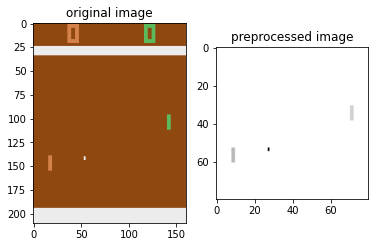

In [24]:
import matplotlib
import matplotlib.pyplot as plt

# show what a preprocessed image looks like
env.reset()
_, _, _, _ = env.step(0)
# get a frame after 20 steps
for _ in range(20):
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 80 x 80 black and white image
plt.imshow(pong_utils.preprocess_single(frame), cmap='Greys')
plt.show()



# Policy

## Exercise 1: Implement your policy
 
Here, we define our policy. The input is the stack of two different frames (which captures the movement), and the output is a number $P_{\rm right}$, the probability of moving left. Note that $P_{\rm left}= 1-P_{\rm right}$

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F



# set up a convolutional neural net
# the output is the probability of moving right
# P(left) = 1-P(right)
class Policy(nn.Module):

    def __init__(self):
        super(Policy, self).__init__()
        # 80x80 to outputsize x outputsize
        # outputsize = (inputsize - kernel_size + stride)/stride 
        # (round up if not an integer)

        # 2 channel from the stacked frame
        self.conv1 = nn.Conv2d(2, 4, kernel_size=2, stride=2, bias=False)
        # 40x40x4 to 20x20x8
        self.conv2 = nn.Conv2d(4, 8, kernel_size=2, stride=2)
        # 20x20x8 to 10x10x16
        self.conv3 = nn.Conv2d(8, 16, kernel_size=2, stride=2)
        # 10x10x16 to 5x5x32
        self.conv4 = nn.Conv2d(16, 32, kernel_size=2, stride=2)
        self.size=5*5*32

        # two fully connected layer
        self.fc1 = nn.Linear(self.size, 256)
        self.fc2 = nn.Linear(256, 1)

        # Sigmoid to 
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # flatten the tensor
        x = x.view(-1,self.size)
        x = F.relu(self.fc1(x))
        return self.sig(self.fc2(x))
      
# use your own policy!
policy = Policy().to(device)

#policy=pong_utils.Policy().to(device)

# we use the adam optimizer with learning rate 2e-4
# optim.SGD is also possible
import torch.optim as optim
optimizer = optim.Adam(policy.parameters(), lr=1e-4)

# Game visualization
pong_utils contain a play function given the environment and a policy. An optional preprocess function can be supplied. Here we define a function that plays a game and shows learning progress

In [14]:
pong_utils.play(env, policy, time=100) 

AttributeError: ignored

# Rollout
Before we start the training, we need to collect samples. To make things efficient we use parallelized environments to collect multiple examples at once

In [0]:
envs = pong_utils.parallelEnv('PongDeterministic-v4', n=4, seed=12345)
prob, state, action, reward = pong_utils.collect_trajectories(envs, policy, tmax=100)

# Function Definitions
Here you will define key functions for training. 

## Exercise 2: write your own function for training
(this is the same as policy_loss except the negative sign)

### REINFORCE
you have two choices (usually it's useful to divide by the time since we've normalized our rewards and the time of each trajectory is fixed)

1. $\frac{1}{T}\sum^T_t R_{t}^{\rm future}\log(\pi_{\theta'}(a_t|s_t))$
2. $\frac{1}{T}\sum^T_t R_{t}^{\rm future}\frac{\pi_{\theta'}(a_t|s_t)}{\pi_{\theta}(a_t|s_t)}$ where $\theta'=\theta$ and make sure that the no_grad is enabled when performing the division

In [16]:
import numpy as np
# convert states to probability, passing through the policy
def states_to_prob(policy, states):
    states = torch.stack(states)
    policy_input = states.view(-1,*states.shape[-3:])
    return policy(policy_input).view(states.shape[:-3])

def surrogate(policy, old_probs, states, actions, rewards,
              discount = 0.995, epsilon=0.1, beta=0.01):

    ########
    discount = discount**np.arange(len(rewards))
    #print(discount)
    rewards = np.asarray(rewards)*discount[:,np.newaxis] 
    # [:,np.newaxis] for broadcasting purpose
    #print(rewards.shape)
    # convert rewards to future rewards (future rewards is the backward cumulative sum)
    rewards_future = rewards[::-1].cumsum(axis=0)[::-1]
    
    #Rewards Normalization for Noise Reduction
    mean = np.mean(rewards_future, axis=1)
    std = np.std(rewards_future, axis=1) + 1.0e-10

    rewards_normalized = (rewards_future - mean[:,np.newaxis])/std[:,np.newaxis]
    
    # convert everything into pytorch tensors and move to gpu if available
    actions = torch.tensor(actions, dtype=torch.int8, device=device)
    old_probs = torch.tensor(old_probs, dtype=torch.float, device=device)
    rewards = torch.tensor(rewards_normalized, dtype=torch.float, device=device)

    # convert states to policy (or probability)
    new_probs = states_to_prob(policy, states)
    new_probs = torch.where(actions ==  RIGHTFIRE, new_probs, 1.0-new_probs)
    
    # ratio for clipping
    ratio = new_probs/old_probs
    #ratio = torch.log(new_probs)
    
    # clipped function
    clip = torch.clamp(ratio, 1-epsilon, 1+epsilon)
    clipped_surrogate = torch.min(ratio*rewards, clip*rewards)

    # include a regularization term
    # this steers new_policy towards 0.5
    # which prevents policy to become exactly 0 or 1
    # this helps with exploration
    # add in 1.e-10 to avoid log(0) which gives nan
    entropy = -(new_probs*torch.log(old_probs+1.e-10)+ \
        (1.0-new_probs)*torch.log(1.0-old_probs+1.e-10))

    return torch.mean(clipped_surrogate +beta*entropy)


Lsur= surrogate(policy, prob, state, action, reward)

print(Lsur)

tensor(-0.6595, device='cuda:0')


# Training
We are now ready to train our policy!
WARNING: make sure to turn on GPU, which also enables multicore processing. It may take up to 45 minutes even with GPU enabled, otherwise it will take much longer!

In [17]:
from parallelEnv import parallelEnv
import numpy as np
# WARNING: running through all 800 episodes will take 30-45 minutes

# training loop max iterations
episode = 400
# episode = 800

# widget bar to display progress
!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episode).start()

# initialize environment
envs = parallelEnv('PongDeterministic-v4', n=8, seed=1234)

discount_rate = .99
beta = .01
tmax = 250

# keep track of progress
mean_rewards = []

for e in range(episode):

    # collect trajectories
    old_probs, states, actions, rewards = \
        pong_utils.collect_trajectories(envs, policy, tmax=tmax)
        
    total_rewards = np.sum(rewards, axis=0)

    # this is the SOLUTION!
    # use your own surrogate function
    L = -surrogate(policy, old_probs, states, actions, rewards, beta=beta)
    #L = -pong_utils.surrogate(policy, old_probs, states, actions, rewards, beta=beta)
    optimizer.zero_grad()
    L.backward()
    optimizer.step()
    del L
        
    # the regulation term also reduces
    # this reduces exploration in later runs
    beta*=.995
    
    # get the average reward of the parallel environments
    mean_rewards.append(np.mean(total_rewards))
    
    # display some progress every 20 iterations
    if (e+1)%20 ==0 :
        print("Episode: {0:d}, score: {1:f}".format(e+1,np.mean(total_rewards)))
        print(total_rewards)
        
    # update progress widget bar
    timer.update(e+1)
    
timer.finish()
    

  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12074 sha256=1d677354d9822578da97b073658b7abff7fb2657f3a1b4aec638b0b550a73cd9
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


Episode: 20, score: -11.625000
[-12. -11.  -9. -12. -13. -12. -12. -12.]


Episode: 40, score: -11.500000
[-13. -12. -12. -12. -12. -12.  -7. -12.]


Episode: 60, score: -11.125000
[-12. -11. -10. -12.  -8. -12. -12. -12.]


Episode: 80, score: -11.125000
[-12.  -6. -12. -12. -10. -12. -13. -12.]


Episode: 100, score: -11.125000
[-12. -11. -10. -12. -12. -12.  -8. -12.]


Episode: 120, score: -11.500000
[-12. -11. -12. -11. -12. -12. -12. -10.]


Episode: 140, score: -9.250000
[ -8. -12. -10.  -9. -13.  -8.  -3. -11.]


Episode: 160, score: -11.125000
[ -7. -12. -11. -11. -13. -10. -13. -12.]


Episode: 180, score: -11.250000
[-12. -12. -13. -10. -10. -12. -10. -11.]


Episode: 200, score: -9.625000
[ -7. -10. -12. -11.  -4.  -9. -12. -12.]


Episode: 220, score: -10.625000
[-10. -13. -10. -10. -11. -12. -12.  -7.]


Episode: 240, score: -9.250000
[ -8. -12.  -7. -10.  -7. -12.  -9.  -9.]


Episode: 260, score: -9.875000
[-11. -11. -12.  -9.  -8. -10.  -6. -12.]


Episode: 280, score: -10.000000
[-13. -10. -12.  -9. -12.  -8. -10.  -6.]


Episode: 300, score: -10.375000
[-12. -12.  -7. -10.  -9. -12.  -9. -12.]


Episode: 320, score: -9.500000
[-12. -11. -12. -12.  -2.  -8.  -8. -11.]


Episode: 340, score: -11.375000
[-12. -13. -12.  -8. -12. -11. -12. -11.]


Episode: 360, score: -10.875000
[-10. -12. -10. -12. -12. -12. -10.  -9.]


Episode: 380, score: -10.250000
[-10. -10.  -8.  -9. -11. -10. -12. -12.]


Episode: 400, score: -11.375000
[-10. -12. -11. -12. -12. -10. -12. -12.]


In [0]:
# play game after training!
pong_utils.play(env, policy, time=2000) 

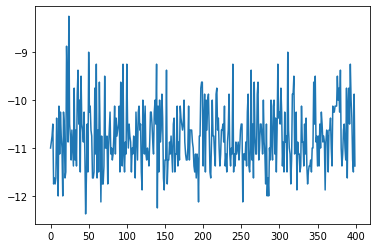

In [18]:
plt.plot(mean_rewards)

In [19]:
# save your policy!
torch.save(policy, 'REINFORCE.policy')

# load your policy if needed
policy = torch.load('REINFORCE.policy')

# try and test out the solution!
# policy = torch.load('PPO_solution.policy')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Policy. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### PPO

In [22]:
from parallelEnv import parallelEnv
import numpy as np
# keep track of how long training takes
# WARNING: running through all 800 episodes will take 30-45 minutes

# training loop max iterations
episode = 500

# widget bar to display progress
#!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episode).start()


envs = parallelEnv('PongDeterministic-v4', n=8, seed=1234)

discount_rate = .99
epsilon = 0.1
beta = .01
tmax = 320
SGD_epoch = 4

# keep track of progress
mean_rewards = []

for e in range(episode):

    # collect trajectories
    old_probs, states, actions, rewards = \
        pong_utils.collect_trajectories(envs, policy, tmax=tmax)
        
    total_rewards = np.sum(rewards, axis=0)


    # gradient ascent step
    for _ in range(SGD_epoch):
        
        # uncomment to utilize your own clipped function!
        L = -surrogate(policy, old_probs, states, actions, rewards, epsilon=epsilon, beta=beta)

        #L = -pong_utils.clipped_surrogate(policy, old_probs, states, actions, rewards, epsilon=epsilon, beta=beta)
        optimizer.zero_grad()
        L.backward()
        optimizer.step()
        del L
    
    # the clipping parameter reduces as time goes on
    epsilon*=.999
    
    # the regulation term also reduces
    # this reduces exploration in later runs
    beta*=.995
    
    # get the average reward of the parallel environments
    mean_rewards.append(np.mean(total_rewards))
    
    # display some progress every 20 iterations
    if (e+1)%20 ==0 :
        print("Episode: {0:d}, score: {1:f}".format(e+1,np.mean(total_rewards)))
        print(total_rewards)
        
    # update progress widget bar
    timer.update(e+1)
    
timer.finish()

Episode: 20, score: -14.250000
[-14. -16. -10. -16. -15. -17. -10. -16.]


Episode: 40, score: -13.875000
[-15. -16. -15. -10. -16. -10. -14. -15.]


Episode: 60, score: -12.375000
[-16. -14. -11. -11. -15. -11. -15.  -6.]


Episode: 80, score: -13.875000
[-16. -16.  -8. -16. -14. -13. -16. -12.]


Episode: 100, score: -13.875000
[-16. -17. -12. -15.  -9. -14. -12. -16.]


Episode: 120, score: -14.125000
[-10. -15. -15. -14. -16. -15. -12. -16.]


Episode: 140, score: -14.625000
[-16. -16. -12. -15. -15. -16. -13. -14.]


Episode: 160, score: -14.875000
[-15. -15. -14. -16. -16. -15. -12. -16.]


Episode: 180, score: -13.125000
[-16. -16. -10. -10. -15. -10. -13. -15.]


Episode: 200, score: -12.875000
[-16. -14. -12. -12. -10. -14. -12. -13.]


Episode: 220, score: -14.125000
[-11. -16. -12. -17. -12. -16. -14. -15.]


Episode: 240, score: -14.500000
[-14. -15. -16. -16. -15. -11. -16. -13.]


Episode: 260, score: -14.500000
[-14. -13. -16. -12. -16. -17. -13. -15.]


Episode: 280, score: -14.625000
[-13. -14. -15. -16. -16. -11. -16. -16.]


Episode: 300, score: -14.750000
[-13. -15. -16. -15. -16. -15. -15. -13.]


Episode: 320, score: -14.375000
[-16. -12. -16. -14. -13. -13. -17. -14.]


Episode: 340, score: -14.750000
[-16. -15. -13. -16. -15. -16. -11. -16.]


Episode: 360, score: -15.375000
[-15. -16. -15. -16. -16. -13. -16. -16.]


Episode: 380, score: -14.000000
[-14. -14. -17. -14. -11. -15. -16. -11.]


Episode: 400, score: -13.875000
[ -8. -17. -16. -11. -16. -14. -14. -15.]


Episode: 420, score: -13.625000
[-13. -12. -14. -13. -12. -16. -13. -16.]


Episode: 440, score: -12.875000
[-12. -14. -13. -16. -13. -11. -11. -13.]


Episode: 460, score: -13.875000
[-15. -12. -14. -16. -13. -10. -15. -16.]


Episode: 480, score: -14.500000
[-15. -16. -12. -13. -16. -16. -16. -12.]


Episode: 500, score: -14.750000
[-16. -12. -15. -16. -14. -17. -16. -12.]


In [23]:
# save your policy!
torch.save(policy, 'PPO.policy')

# load policy if needed
policy = torch.load('PPO.policy')

# try and test out the solution 
# make sure GPU is enabled, otherwise loading will fail
# (the PPO verion can win more often than not)!
#
# policy_solution = torch.load('PPO_solution.policy')
# pong_utils.play(env, policy_solution, time=2000) 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Policy. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [26]:
pong_utils.play(env, policy, time=200) 

AttributeError: ignored

In [29]:
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   1.5.0          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.13.3         
botocore                 1.16.3         
Bottleneck      